In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cd "~\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat


In [4]:
data=np.loadtxt(open('s0513_15 neL end on.txt',"r"),delimiter=",")

In [5]:
def lineout(data, start, stop):
    length=np.sqrt((stop[0]-start[0])**2+(stop[1]-start[1])**2)
    xs, ys=np.linspace(start[0], stop[0], length), np.linspace(start[1], stop[1], length)
    lineout = data[xs.astype(np.int), ys.astype(np.int)]
    return lineout
def mm_to_px(mm_coords, scale, origin):
    return (mm_coords[0]*scale+origin[0], mm_coords[1]*scale+origin[1])

In [6]:
def radial_lineout(R0, y0, sign, th, data, origin, scale):
    sta=(sign*(y0-R0*np.cos(th*np.pi/180.0)),R0*np.sin(th*np.pi/180.0))
    sto=(0,y0*np.tan(th*np.pi/180.0))
    sta_px=mm_to_px(sta, scale, origin)
    sto_px=mm_to_px(sto, scale, origin)
    lo=lineout(data, sta_px, sto_px)
    mm_axis=np.linspace(R0, R0+lo.size/scale, lo.size)
    return mm_axis, lo

KeyError: '33.0'

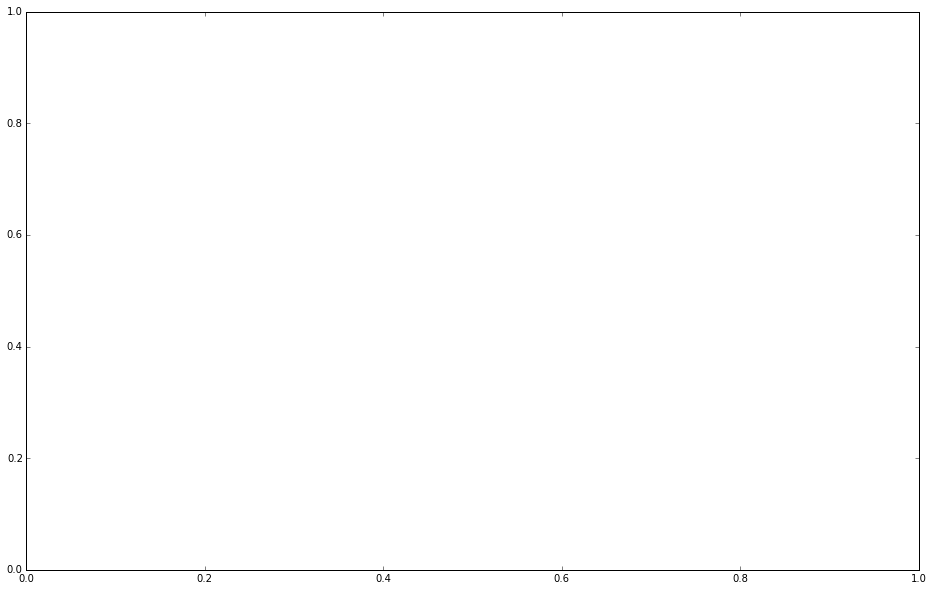

In [29]:
origin=(1420,2500)
scale=173.0#px/mm
y0=13.5
R0=8.5#array radius
angles=np.array([+33, +11.25])
ang_color={'33.75':'r', '11.25':'k'}
xs=[]
rls=[]
fig, ax1=plt.subplots(figsize=(16,10))

for s in [+1,-1]:
    for th in angles:
        if s==+1:
            half='Lower:'
            ls='-'
        if s==-1:
            half='Upper:'
            ls=':'
        x, rl=radial_lineout(R0=R0, y0=y0, sign=s, th=th, data=data,origin=origin, scale=scale)
        ax1.plot(x,rl/1e17, label=half+r'$\theta=$'+str(th)+r'$^{\circ}$', lw=5, ls=ls, color=ang_color[str(th)])
        xs.append(x)
        rls.append(rl)
    
ax1.set_xlabel('Distance from array centre (mm)', fontsize=32)
ax1.set_ylabel(r'$\int \,n_e dx \,(\times 10^{17}\,cm^{-2})$',fontsize=32)
#ax1.set_ylim([0, 12])
ax1.tick_params(labelsize=28, pad=5, length=10, width=2)
ax1.tick_params(axis='x',pad=20)
ax1.legend(fontsize=20)
ax1.set_title(r'Radial lineouts',fontsize=30, y=1.02, )

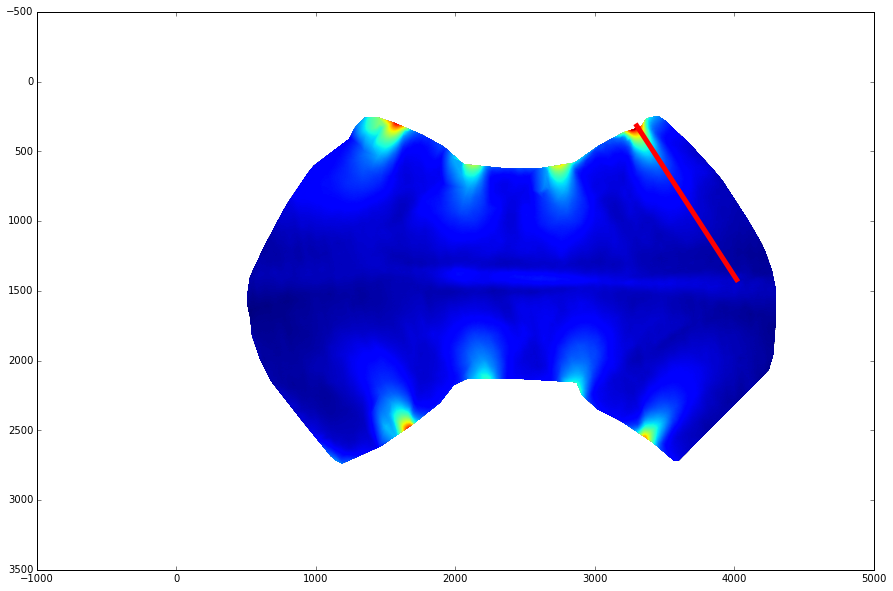

In [30]:
origin=(1420,2500)
scale=173.0#px/mm
y0=13.5
R0=8.5#array radius
sign=-1#+ for bottom array, - for top array
th=33#angle with respect to y axis
sta=(sign*(y0-R0*np.cos(th*np.pi/180.0)),R0*np.sin(th*np.pi/180.0))
sto=(0,y0*np.tan(th*np.pi/180.0))
sta_px=mm_to_px(sta, scale, origin)
sto_px=mm_to_px(sto, scale, origin)

fig, ax=plt.subplots(figsize=(16,10))
im=ax.imshow(data)
li=ax.plot([sta_px[1],sto_px[1]],[sta_px[0],sto_px[0]], lw=5, color='r')

In [7]:
def radial_lineout(data, array_origin, origin, angle, R0, scale):
    R0_px=R0*scale
    th=angle*np.pi/180.0
    y0=array_origin[0]
    x0=array_origin[1]
    sta_px=(y0, x0)
    Delta_y=origin[0]-y0
    sto_px=(origin[0],origin[1]-Delta_y*np.tan(th))    
    lo=lineout(data, sta_px, sto_px)
    mm_axis=np.linspace(0, lo.size/scale, lo.size)
    return mm_axis, lo

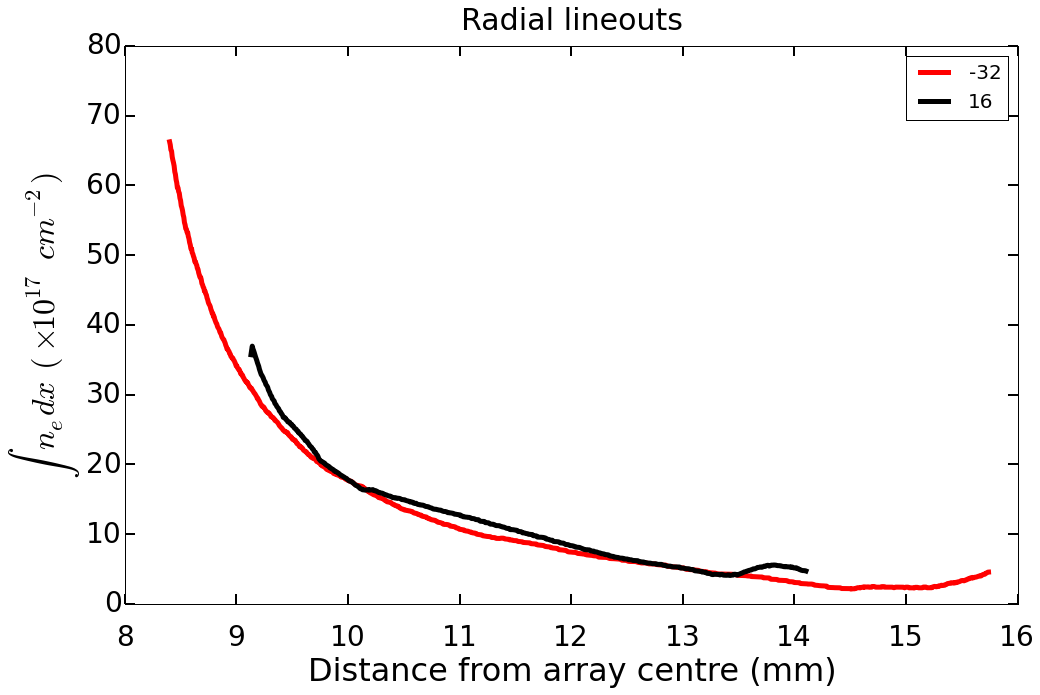

In [8]:
origin=(1420,2500)
upper_array=(-2332+1420, 50+2500)
scale=173.0#px/mm
R0=8.5#array radius
angle=-32#angle with respect to y axis

fig, ax1=plt.subplots(figsize=(16,10))
x1, r1=radial_lineout(data, upper_array, origin, angle, R0, scale)
ax1.plot(x1,r1/1e17, label=str(angle), lw=5, color='red')

angle=16#angle with respect to y axis
x2, r2=radial_lineout(data, upper_array, origin, angle, R0, scale)
ax1.plot(x2,r2/1e17, label=str(angle), lw=5, color='black')
ax1.set_ylim([0,80])
ax1.set_xlim([8,16])
    
ax1.set_xlabel('Distance from array centre (mm)', fontsize=32)
ax1.set_ylabel(r'$\int \,n_e dx \,(\times 10^{17}\,cm^{-2})$',fontsize=32)
#ax1.set_ylim([0, 12])
ax1.tick_params(labelsize=28, pad=5, length=10, width=2)
ax1.tick_params(axis='x',pad=20)
ax1.legend(fontsize=20)
ax1.set_title(r'Radial lineouts',fontsize=30, y=1.02, )

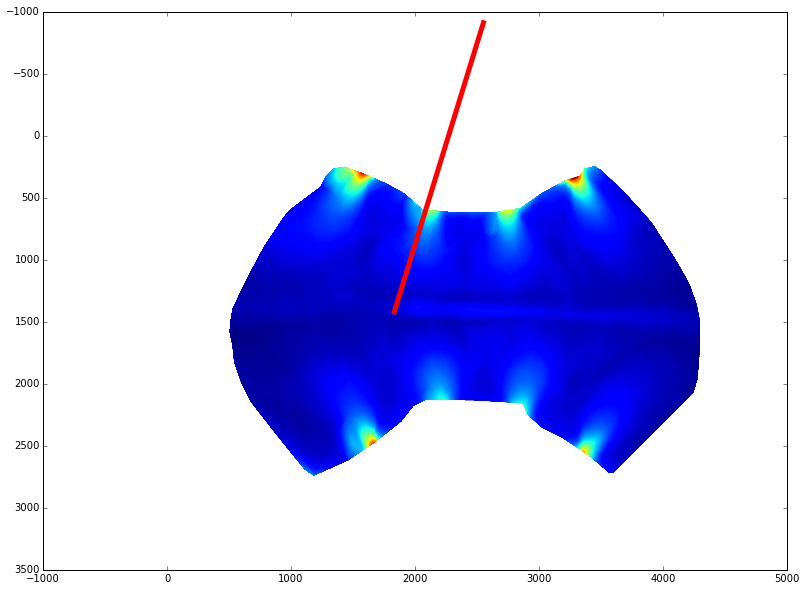

In [41]:
origin=(1420,2500)
array_origin=(-2332+1420, 50+2500)
scale=173.0#px/mm
R0=8.5#array radius
th=16#angle with respect to y axis
R0_px=R0*scale
y0=array_origin[0]
x0=array_origin[1]
sta_px=(y0, x0)
Delta_y=origin[0]-y0
sto_px=(origin[0],origin[1]-Delta_y*np.tan(th*np.pi/180.0)) 

fig, ax=plt.subplots(figsize=(16,10))
im=ax.imshow(data)
li=ax.plot([sta_px[1],sto_px[1]],[sta_px[0],sto_px[0]], lw=5, color='r')